<a href="https://colab.research.google.com/github/Lavan1999/Dataset-21_HR_Analysis_GradientBoostingClassifier/blob/main/HR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor, LazyClassifier

#Machine Learning Training
# Regression
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
# Classification
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#Machine Learning Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, top_k_accuracy_score,precision_score,recall_score,precision_score #Classification

# **Connections**

In [ ]:
#Google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading dataset**

In [ ]:
#Google drive
file_path = '/content/drive/My Drive/Dataset/HR Analytics/train_LZdllcl.csv'
df = pd.read_csv(file_path)

In [ ]:
#Google drive
file_path = '/content/drive/My Drive/Dataset/HR Analytics/test_2umaH9m.csv'
df_test = pd.read_csv(file_path)

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7.0,31.0,2.0,0.0,2.0,1,35,5.0,8,1,0,49,0
1,65141,4.0,14.0,0.0,1.0,0.0,1,30,5.0,4,0,0,60,0
2,7513,7.0,10.0,0.0,1.0,2.0,1,34,3.0,7,0,0,50,0
3,2542,7.0,15.0,0.0,1.0,0.0,2,39,1.0,10,0,0,50,0
4,48945,8.0,18.0,0.0,1.0,0.0,1,45,3.0,2,0,0,73,0


In [ ]:
df.shape

(54808, 14)

# **DataFrame observation**


In [ ]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
# Dependent - 'is_promoted'
""" Independent - 'employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'"""

continuous_columns = ["employee_id","no_of_trainings","age","length_of_service","avg_training_score"]
category_columns = ['department', 'region', 'education', 'gender',
       'recruitment_channel', 'previous_year_rating',
       'KPIs_met >80%', 'awards_won?',
       'is_promoted']

#Supervised

# **Data cleaning using pandas**


Handling Null Values

Handling Duplicates

Data Type Conversion

Standardizing or Normalizing Data

Handling Text Data

Handling Date and Time Data

Handling Outliers

In [ ]:
df.set_index('id', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df['previous_year_rating'].fillna(value = df['previous_year_rating'].median(), inplace = True)

In [ ]:
df_test['previous_year_rating'].fillna(value = df_test['previous_year_rating'].median(), inplace = True)

In [ ]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [ ]:
df.education.value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [ ]:
df.education.fillna("Bachelor's",inplace = True)

In [ ]:
df_test.education.fillna("Bachelor's", inplace = True)

In [ ]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [ ]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Selecting numeric columns only

In [ ]:
numeric_df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004209,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004209,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230
length_of_service,0.001274,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000


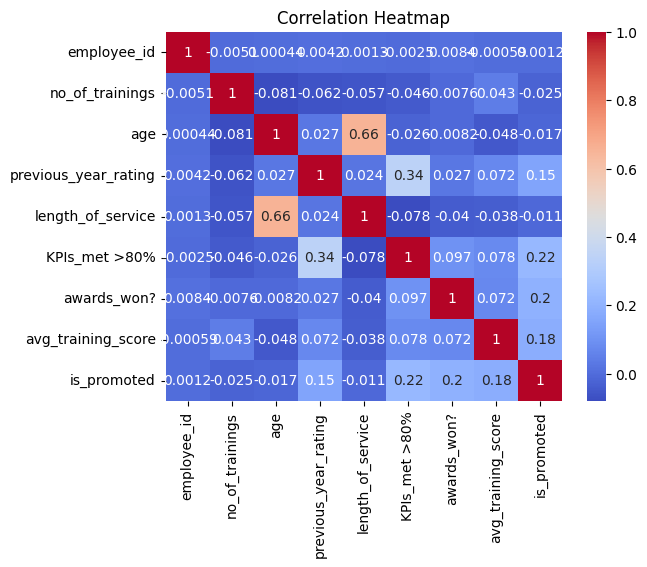

In [ ]:
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,employee_id,no_of_trainings,age,length_of_service,avg_training_score
Population Mean,39195.830627,1.253011,34.803915,5.865512,63.38675
Sample Means,{39168.393517927194},{1.251272694097254},{34.80405984855396},{5.866186935498586},{63.373957668095976}
H0_accepted,5737,5488,5565,5546,5508
H0_rejected,5224,5473,5396,5415,5453
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si..."


In [ ]:
comperativeColumn_result

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
department,There is a relationship,NaN,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
region,There is a relationship,There is a relationship,NaN,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship
education,There is a relationship,There is a relationship,There is a relationship,NaN,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
gender,There is a relationship,There is a relationship,There is a relationship,There is a relationship,NaN,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
recruitment_channel,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,NaN,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
no_of_trainings,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship
age,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship
previous_year_rating,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,NaN,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship
length_of_service,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship


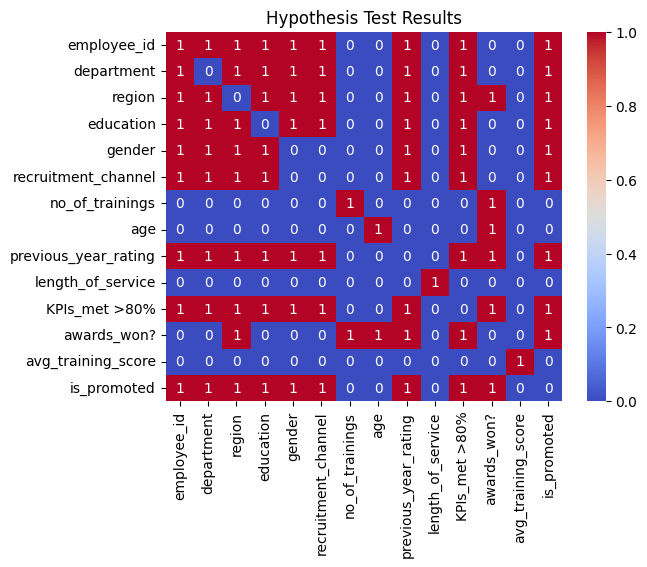

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [ ]:
sns.set()
comperativeColumn_result.fillna(3, inplace = True)
comperativeColumn_result.replace({'There is a relationship': 0, 'There is no relationship': 1}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

# **Data Visualization**

In [ ]:
correlation_matrix = numeric_df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.00,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.00,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.00,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.00,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.00,2,0,0,73,0


In [ ]:
df.recruitment_channel.unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Average Training Score vs Promotion')

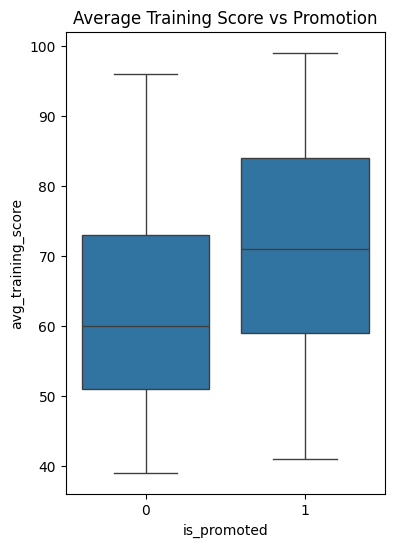

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='is_promoted', y='avg_training_score', data=df)
plt.title('Average Training Score vs Promotion')

Text(0.5, 1.0, 'Promotion Status')

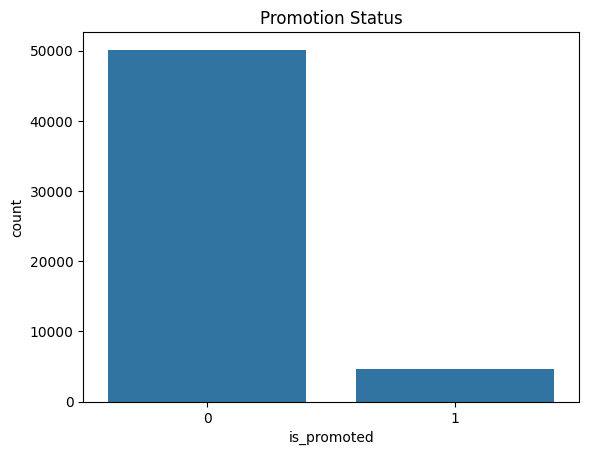

In [ ]:
sns.countplot(x='is_promoted', data=df)
plt.title('Promotion Status')

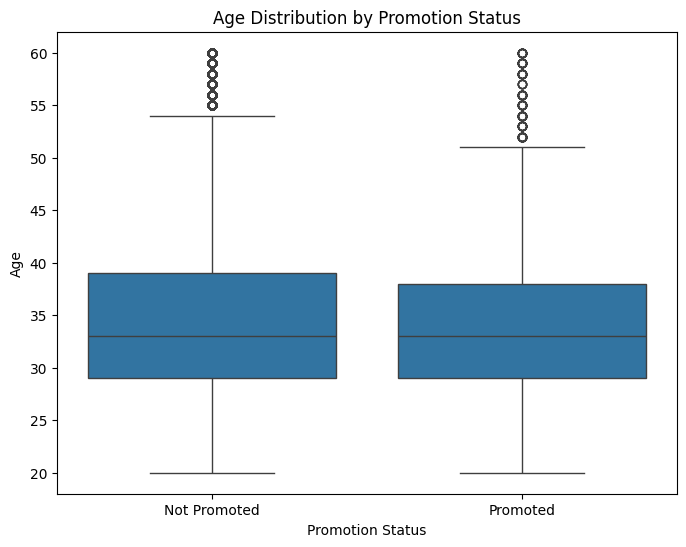

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_promoted', y='age', data=df)
plt.title('Age Distribution by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Promoted', 'Promoted'])
plt.show()

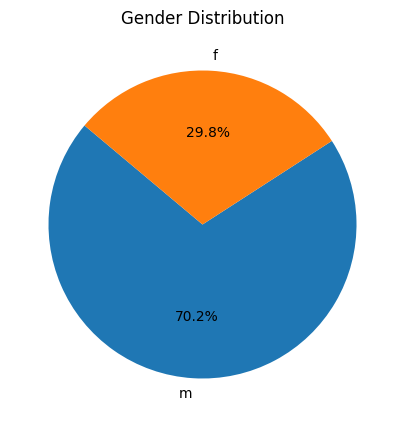

In [ ]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

# **Preprocessing**

In [ ]:
# Replacing categorical values with numerical equivalents

In [ ]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [ ]:
columns=["department", "region", "education", "gender","recruitment_channel",]
encode=OrdinalEncoder()
for i in columns:
  df[i] = encode.fit_transform(df[[i]])
  print(i,'---',df[i].unique())
  print('---------------------------')

department --- [7. 4. 8. 0. 6. 5. 1. 2. 3.]
---------------------------
region --- [31. 14. 10. 15. 18. 11. 12. 27.  0. 28. 21. 24.  6.  5.  2. 29. 20.  8.
  4.  7. 17.  1. 19. 23.  3. 13. 32. 25. 30. 26. 16. 22. 33.  9.]
---------------------------
education --- [2. 0. 1.]
---------------------------
gender --- [0. 1.]
---------------------------
recruitment_channel --- [2. 0. 1.]
---------------------------


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.is_promoted.value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [ ]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.00,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.00,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.00,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.00,7,0,0,61


In [ ]:
columns=["department", "region", "education", "gender","recruitment_channel",]
encode=OrdinalEncoder()
for i in columns:
  df_test[i] = encode.fit_transform(df_test[[i]])
  print(i,'---',df_test[i].unique())
  print('---------------------------')

department --- [8. 2. 7. 5. 1. 0. 4. 3. 6.]
---------------------------
region --- [18. 28.  4. 11. 21. 31. 14.  7.  8. 16.  2. 19. 33. 12. 27. 15. 32.  5.
 24. 10. 29. 20.  6. 22. 17.  3. 13. 23.  1. 26. 25. 30.  0.  9.]
---------------------------
education --- [0. 2. 1.]
---------------------------
gender --- [1. 0.]
---------------------------
recruitment_channel --- [2. 0. 1.]
---------------------------


In [ ]:
df_test.info()

# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

In [ ]:
# 2 separating independent and dependent
x_train=df.drop("is_promoted",axis=1)
y_train=df["is_promoted"]

In [ ]:
x_test = df_test

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_1 = GradientBoostingClassifier().fit(x_train,y_train)
y_pred = model_1.predict(df_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])